In [3]:
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
from textblob import TextBlob
from wordcloud import WordCloud


In [4]:
# Authentication
consumerKey = ""
consumerSecret = ""
accessToken = ""
accessTokenSecret = ""
bearerToken = ""
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'@\w+','',text)
    text = re.sub(r'http\S+','',text)
    text = re.sub(r'www\S+','',text)
    text = re.sub(r'[^a-z\s\.\?\!]','',text)
    text = re.sub(r'^rt','',text)
    return text

def preprocessing(text):
    text = clean_text(text)
    return text

In [128]:
keyword = "Joe Biden"
tweets = []
for i in range(1): # twitter allows max 100 per query
    tweets.extend(api.search_tweets(q=keyword, count=100))
len(tweets)

87

In [135]:
df = pd.DataFrame()
tweet_dict = {'text' : []}
for tweet in tweets:
    # tweet_dict['id'].append(tweet.id)
    # tweet_dict['org_text'].append(tweet.text)
    tweet_dict['text'].append(preprocessing(tweet.text))
df = pd.DataFrame.from_dict(tweet_dict)
df.drop_duplicates(inplace=True)
df

,text
0,meanwhile corrupted fbidoj has been protecti...
1,vladimir putin of russia authorized extensi...
2,black ppls obsession with ppl going to jail ...
3,u.s. president joe biden announced the intro...
4,marjorie taylor greene said that joe bidens ...
...,...
79,na fronteira entre a ucrnia e a polnia um pi...
80,until joe biden expands medicare to cover ev...
82,dear joe biden\n\nit doesnt matter how much ...
84,breaking joe biden unfriends putin on facebook.


In [136]:
for idx, row in df['text'].iteritems():
    scores = TextBlob(row)
    df.loc[idx, 'polarity'] = scores.sentiment.polarity
    df.loc[idx, 'subjectivity'] = scores.sentiment.subjectivity
    polarity = scores.sentiment.polarity
    if polarity > 0:
        sentiment = 'positive'
    elif polarity < 0:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'
    df.loc[idx, 'sentiment'] = sentiment   
df.head()

,text,polarity,subjectivity,sentiment
0,meanwhile corrupted fbidoj has been protecti...,0.000000,0.000000,neutral
1,vladimir putin of russia authorized extensi...,0.000000,0.333333,neutral
2,black ppls obsession with ppl going to jail ...,-0.155556,0.411111,negative
3,u.s. president joe biden announced the intro...,0.000000,0.150000,neutral
4,marjorie taylor greene said that joe bidens ...,0.000000,0.000000,neutral


In [139]:
def plot_wordcloud(tweets):
    wordcloud = WordCloud().generate(' '.join([t for t in tweets]))
    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

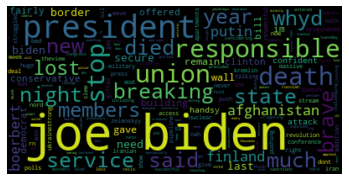

In [140]:
pos_tweets = df[df['sentiment'] == 'positive']['text']
plot_wordcloud(pos_tweets)

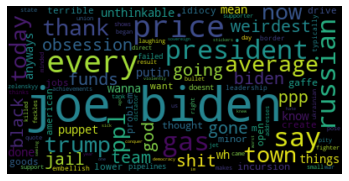

In [141]:
pos_tweets = df[df['sentiment'] == 'negative']['text']
plot_wordcloud(pos_tweets)